In [10]:
import numpy as np
import pandas as pd
from sklearn import tree

In [11]:
df = pd.read_csv("PastHires.csv", header = 0)

In [12]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [13]:
d = {'Y':1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [14]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [15]:
y = df['Hired']
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [16]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

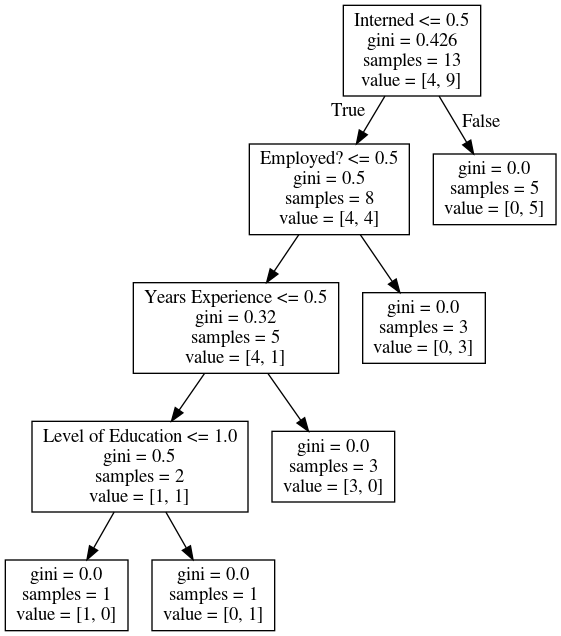

In [17]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                    feature_names=features)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())